# Employee promote prediction

## EDA & Data Preprocessing

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib as mpl

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df21 = pd.read_csv('train.csv')

In [ ]:
df21.shape

(40100, 13)

In [ ]:
null_counts = df21.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))
print(df21.shape)

Number of null values in each column:
employee_id                0
department                 0
region                     0
education               1768
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    3024
length_of_service          0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64
(40100, 13)


In [ ]:
df21.duplicated().sum()

0

In [ ]:
df21.dropna(inplace=True)
df21.shape

(35583, 13)

In [ ]:
df21['is_promoted'].value_counts()

0    32451
1     3132
Name: is_promoted, dtype: int64

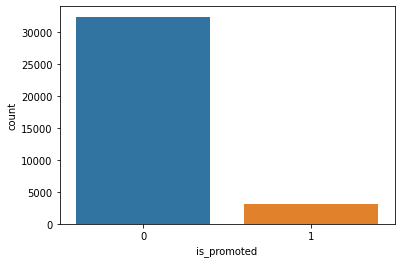

In [ ]:
sns.countplot(x=df21['is_promoted'])
plt.show()

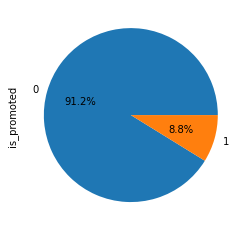

In [ ]:
df21['is_promoted'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [ ]:
df21.groupby('is_promoted').mean()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
is_promoted,,,,,,,
0,39183.936027,1.258328,35.650088,3.272133,6.344458,0.014453,62.906228
1,39033.041188,1.209770,34.990102,3.985951,6.096743,0.118135,71.411877


Beberapa pengamatan dari data train diatas :

- Rata rata avg_training score pada karyawan yang terpromosi lebih besar dibandingkan dengan karyawan yang tidak terpromosi
- Pada untuk previous_year_rating pada karyawan yang terpromosi dan tidak terpromosi tidak terdapat perbedaan yang jauh
- Rata rata umur karyawan yang terpromosi lebih muda dibanding karyawan yang tidak terpromosi dan juga rata rata lama bekerja karyawan yang terpromosi tidak begitu jauh dengan karyawan yang tidak terpromosi
- Dan rata rata karyawan yang mendapatkan awards lebih besar kemungkinan untuk terpromosi dibandingkan dengan yang tidak

In [ ]:
df21.groupby('department').mean().sort_values(by='avg_training_score' , ascending=False)

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
department,,,,,,,,
R&D,38189.651652,1.399399,33.412913,3.561562,4.945946,0.024024,84.606607,0.069069
Analytics,39288.057363,1.341810,33.049970,3.564163,5.326434,0.022472,84.570077,0.099054
Technology,38589.659490,1.257734,35.541388,3.174122,6.340928,0.027383,79.973662,0.111413
Procurement,39677.449130,1.305015,36.502764,3.291914,6.681883,0.027021,70.155169,0.100307
Operations,39209.336410,1.165995,36.550760,3.632523,6.739113,0.023138,60.290264,0.094501
Finance,40170.908811,1.301910,32.659889,3.499076,5.258780,0.027110,60.235983,0.077634
Legal,37812.336585,1.084553,34.969106,3.422764,5.289431,0.027642,59.647154,0.047154
Sales & Marketing,38966.541133,1.287405,35.981334,3.065429,6.493409,0.020687,50.213413,0.072068
HR,40205.542153,1.057717,35.307393,3.494163,6.210765,0.019455,50.090143,0.062905


In [ ]:
pd.crosstab(df21.department, df21.is_promoted)

is_promoted,0,1
department,,
Analytics,3047,335
Finance,1497,126
HR,1445,97
Legal,586,29
Operations,6966,727
Procurement,4395,490
R&D,620,46
Sales & Marketing,9644,749
Technology,4251,533


In [ ]:
px.histogram(df21,x=df21['department'],color='is_promoted',color_discrete_sequence= px.colors.qualitative.D3)

In [ ]:
fig = px.pie(df21, values='is_promoted', names='education')
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=15, uniformtext_mode='show')
fig.show()

In [ ]:
pd.crosstab(df21.education, df21.is_promoted)

is_promoted,0,1
education,,
Bachelor's,22410,2030
Below Secondary,312,32
Master's & above,9729,1070


In [ ]:
edu=pd.DataFrame(df21.groupby(['education','is_promoted'])['education'].count())
prop_df=[]
for val in np.sort(df21['education'].unique()):
    prop=edu['education'][val][1]/(edu['education'][val][1]+edu['education'][val][0])
    prop_df.append({
        'education':val,
        'proportion':prop
    })

prop_df=pd.DataFrame(prop_df)
prop_df.sort_values('proportion',ascending=False,inplace=True)
prop_df

,education,proportion
2,Master's & above,0.099083
1,Below Secondary,0.093023
0,Bachelor's,0.083061


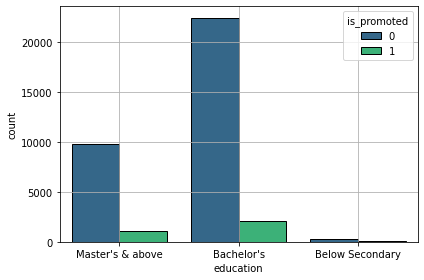

In [ ]:
sns.countplot(df21['education'],hue=df21['is_promoted'],palette='viridis',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

In [ ]:
df21['awards_won?'].value_counts()

0    34744
1      839
Name: awards_won?, dtype: int64

In [ ]:
aw=pd.DataFrame(df21.groupby(['awards_won?','is_promoted'])['awards_won?'].count())
aw

awards_won?
awards_won? is_promoted             
0           0                  31982
            1                   2762
1           0                    469
            1                    370

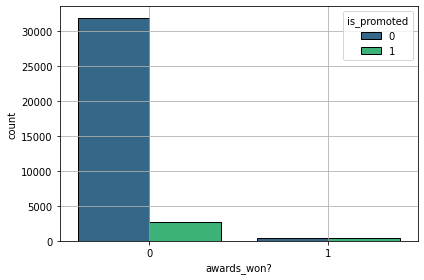

In [ ]:
sns.countplot(df21['awards_won?'],hue=df21['is_promoted'],palette='viridis',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

In [ ]:
prop_df=[]
for val in np.sort(df21['awards_won?'].unique()):
    prop=aw['awards_won?'][val][1]/(aw['awards_won?'][val][1]+aw['awards_won?'][val][0])
    prop_df.append({
        'awards_won?':val,
        'proportion':prop
    })

prop_df=pd.DataFrame(prop_df)
prop_df.sort_values('proportion',ascending=False,inplace=True)
prop_df

,awards_won?,proportion
1,1,0.441001
0,0,0.079496


In [ ]:
rc=pd.DataFrame(df21.groupby(['recruitment_channel','is_promoted'])['recruitment_channel'].count())
pd.crosstab(df21.recruitment_channel, df21.is_promoted)

is_promoted,0,1
recruitment_channel,,
other,18063,1711
referred,623,89
sourcing,13765,1332


In [ ]:
prop_df=[]
for val in np.sort(df21['recruitment_channel'].unique()):
    prop=rc['recruitment_channel'][val][1]/(rc['recruitment_channel'][val][1]+rc['recruitment_channel'][val][0])
    prop_df.append({
        'recruitment_channel':val,
        'proportion':prop
    })

prop_df=pd.DataFrame(prop_df)
prop_df.sort_values('proportion',ascending=False,inplace=True)
prop_df

,recruitment_channel,proportion
1,referred,0.125000
2,sourcing,0.088229
0,other,0.086528


In [ ]:
df21.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,35583.000000,35583.000000,35583.000000,35583.000000,35583.000000,35583.000000,35583.000000,35583.000000
mean,39170.654329,1.254054,35.591996,3.334963,6.322654,0.023579,63.654891,0.088020
std,22647.155248,0.607722,7.542707,1.260519,4.218808,0.151735,13.276886,0.283327
min,2.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19573.500000,1.000000,30.000000,3.000000,3.000000,0.000000,52.000000,0.000000
50%,39197.000000,1.000000,34.000000,3.000000,5.000000,0.000000,61.000000,0.000000
75%,58819.000000,1.000000,39.000000,4.000000,8.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


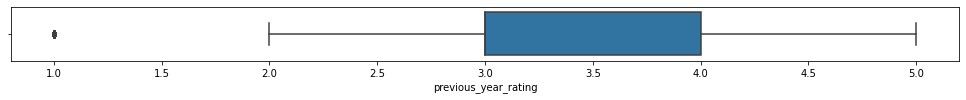

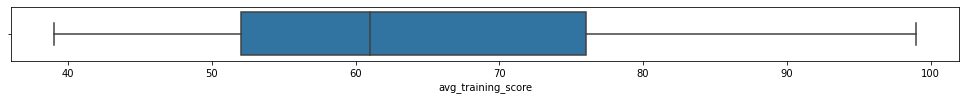

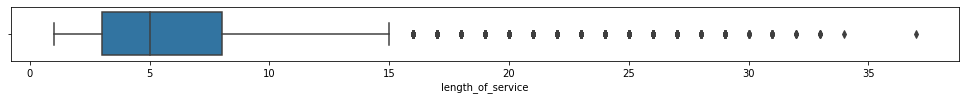

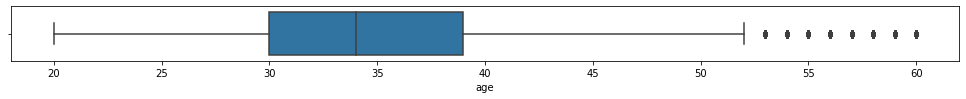

In [ ]:
a = df21[['previous_year_rating' ,'avg_training_score','length_of_service' , 'age']]
for column in a:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=a, x=column)

In [ ]:
def outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

In [ ]:
upper, lower = outliers(df21, "length_of_service")
print('Length of Service')
print("Upper: ", upper)
print("Lower: ", lower)

df = df21[(df21['length_of_service'] > lower) & (df21['length_of_service'] < upper)]

upper, lower = outliers(df, "age")
print('Age')
print("Upper: ", upper)
print("Lower: ", lower)

df21 = df21[(df21['age'] > lower) & (df21['age'] < upper)]

Length of Service
Upper:  15.5
Lower:  -4.5
Age
Upper:  50.0
Lower:  18.0


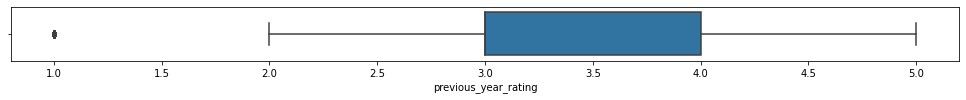

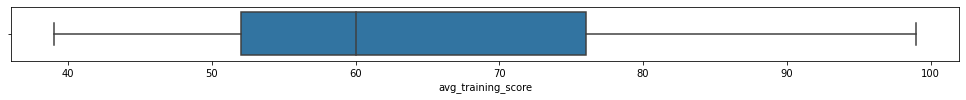

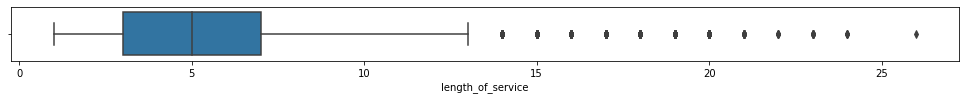

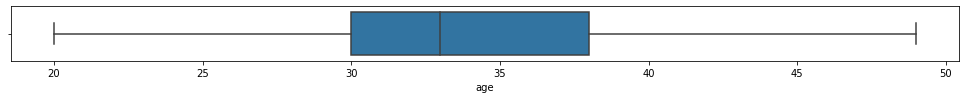

In [ ]:
a = df21[['previous_year_rating' ,'avg_training_score','length_of_service' , 'age']]
for column in a:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=a, x=column)

In [ ]:
df21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32378 entries, 3 to 40099
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           32378 non-null  int64  
 1   department            32378 non-null  object 
 2   region                32378 non-null  object 
 3   education             32378 non-null  object 
 4   gender                32378 non-null  object 
 5   recruitment_channel   32378 non-null  object 
 6   no_of_trainings       32378 non-null  int64  
 7   age                   32378 non-null  int64  
 8   previous_year_rating  32378 non-null  float64
 9   length_of_service     32378 non-null  int64  
 10  awards_won?           32378 non-null  int64  
 11  avg_training_score    32378 non-null  int64  
 12  is_promoted           32378 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 3.5+ MB


In [ ]:
uniq=['department','region','recruitment_channel','education']

for i in uniq:
    print(i)
    print(df21[i].unique())
    print(df21[i].unique().shape[0])
    print()

department
['Analytics' 'Sales & Marketing' 'Technology' 'R&D' 'Operations'
 'Procurement' 'Finance' 'HR' 'Legal']
9

region
['region_4' 'region_26' 'region_13' 'region_23' 'region_25' 'region_15'
 'region_17' 'region_22' 'region_9' 'region_29' 'region_7' 'region_2'
 'region_16' 'region_27' 'region_5' 'region_3' 'region_31' 'region_28'
 'region_12' 'region_20' 'region_6' 'region_30' 'region_11' 'region_32'
 'region_8' 'region_1' 'region_14' 'region_34' 'region_10' 'region_19'
 'region_21' 'region_24' 'region_33' 'region_18']
34

recruitment_channel
['other' 'sourcing' 'referred']
3

education
["Master's & above" "Bachelor's" 'Below Secondary']
3



In [ ]:
l = LabelEncoder()

for i in df21.columns:
    if df21[i].dtype == 'object':
        df21[i]=l.fit_transform(df21[i])

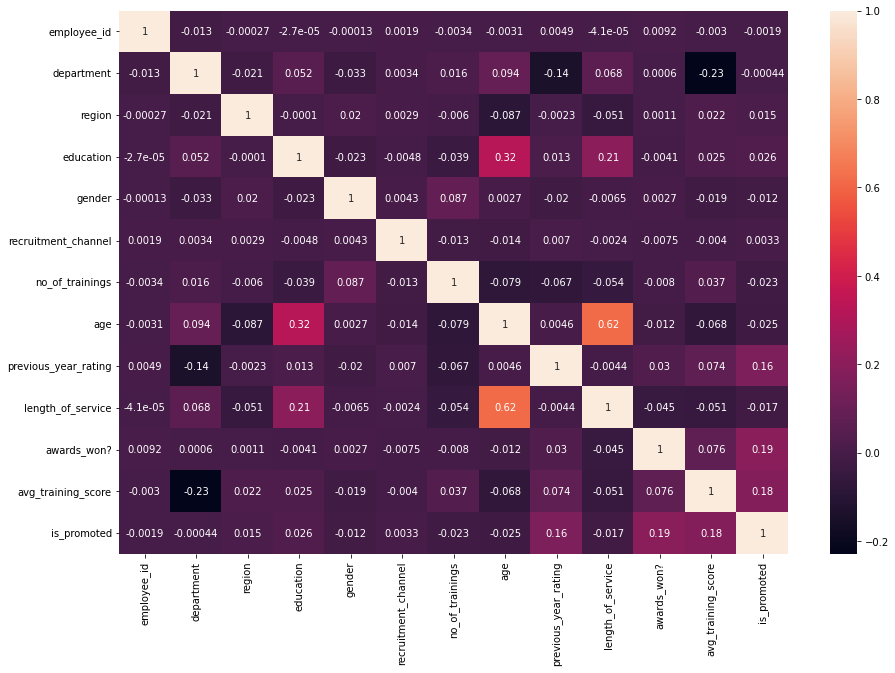

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df21.corr(), annot=True)

In [ ]:
df21.drop(columns=['gender','no_of_trainings','age','length_of_service','employee_id','department'], inplace=True)

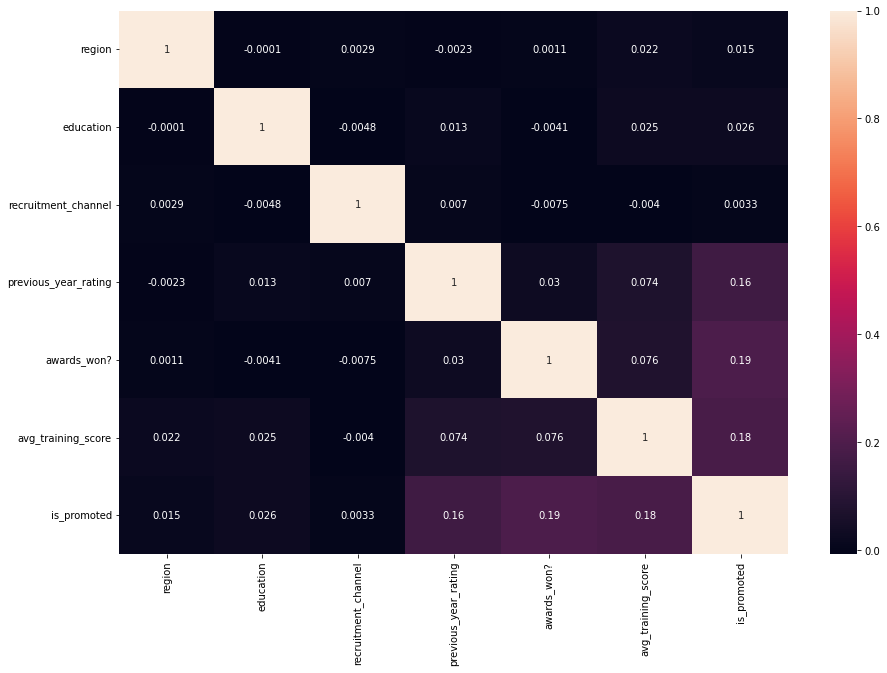

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df21.corr(), annot=True)

In [ ]:
df21.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won?', 'avg_training_score',
       'is_promoted'],
      dtype='object')

## Pembuatan Model


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X = df21.drop('is_promoted',axis=1)
y = df21['is_promoted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# KNN Prediction
print('KNN---------------------------------------------')
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

knn_pred = knn_clf.predict(X_test)
knn_pred_t = knn_clf.predict(X_train)
print(metrics.classification_report(y_test,knn_pred))
print(metrics.classification_report(y_train,knn_pred_t))

# decision tree prediction
print('decision tree----------------------------------')
dc_clf = DecisionTreeClassifier()
dc_clf.fit(X_train, y_train)

dc_pred = dc_clf.predict(X_test)
dc_pred_t = dc_clf.predict(X_train)
print(metrics.classification_report(y_test,dc_pred))
print(metrics.classification_report(y_train,dc_pred_t))

# random forest prediction
print('random forest----------------------------------')
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

rf_pred = rf_clf.predict(X_test)
rf_pred_t = rf_clf.predict(X_train)
print(metrics.classification_report(y_test,rf_pred))
print(metrics.classification_report(y_train,rf_pred_t))


# XGB
print('XGB-------------------------------------------')
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

xgb_pred = xgb_clf.predict(X_test)
xgb_pred_t = xgb_clf.predict(X_train)
print(metrics.classification_report(y_test,xgb_pred))
print(metrics.classification_report(y_train,xgb_pred_t))


# AdaBoost Classifier
print('AdaBoost Classifier-------------------------------------------')
adaboost = AdaBoostClassifier()
adaboost.fit(X_train, y_train)

adb_pred = adaboost.predict(X_test)
adb_pred_t = adaboost.predict(X_train)
print(metrics.classification_report(y_test,adb_pred))
print(metrics.classification_report(y_train,adb_pred_t))

KNN---------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      6489
           1       0.55      0.14      0.23       628

    accuracy                           0.91      7117
   macro avg       0.74      0.57      0.59      7117
weighted avg       0.89      0.91      0.89      7117

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     25962
           1       0.76      0.18      0.28      2504

    accuracy                           0.92     28466
   macro avg       0.84      0.58      0.62     28466
weighted avg       0.91      0.92      0.90     28466

decision tree----------------------------------
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      6489
           1       0.32      0.20      0.25       628

    accuracy                           0.89      7117
   macro avg       0.62      0.

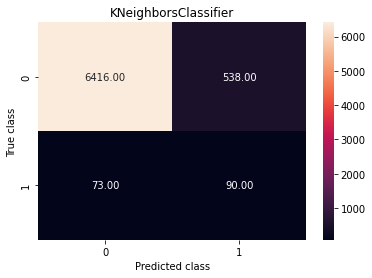

In [ ]:
knn_y_pred = knn_clf.predict(X_test)
knn_cm = metrics.confusion_matrix(knn_y_pred, y_test)
sns.heatmap(knn_cm, annot=True, fmt='.2f',xticklabels = ['0', '1'] , yticklabels = ['0', '1'] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('KNeighborsClassifier')
plt.savefig('KNeighborsClassifier')

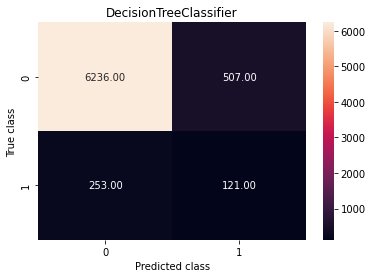

In [ ]:
dc_y_pred = dc_clf.predict(X_test)
dc_cm = metrics.confusion_matrix(dc_y_pred, y_test)
sns.heatmap(dc_cm, annot=True, fmt='.2f',xticklabels = ['0', '1'] , yticklabels = ['0', '1'] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('DecisionTreeClassifier')
plt.savefig('DecisionTreeClassifier')

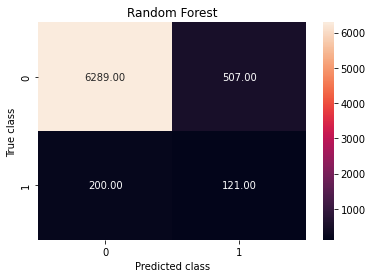

In [ ]:
rf_y_pred = rf_clf.predict(X_test)
rf_cm = metrics.confusion_matrix(rf_y_pred, y_test)
sns.heatmap(rf_cm, annot=True, fmt='.2f',xticklabels = ['0', '1'] , yticklabels = ['0', '1'] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('RandomForestClassifier')

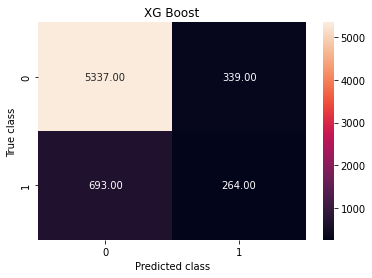

In [ ]:
xgb = xgb_clf.predict(X_test)
xgb = metrics.confusion_matrix(xgb, y_test)
sns.heatmap(xgb, annot=True, fmt='.2f',xticklabels = ['0', '1'] , yticklabels = ['0', '1'] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('XG Boost')
plt.savefig('XG Boost')

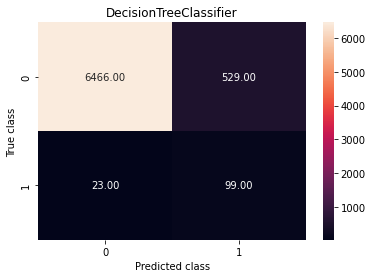

In [ ]:
adb_y_pred = adaboost.predict(X_test)
adb_cm = metrics.confusion_matrix(adb_y_pred, y_test)
sns.heatmap(adb_cm, annot=True, fmt='.2f',xticklabels = ['0', '1'] , yticklabels = ['0', '1'] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('DecisionTreeClassifier')
plt.savefig('DecisionTreeClassifier')

In [ ]:
# Handling imbalance data dengan SMOTEENN

from imblearn.combine import SMOTEENN

smt = SMOTEENN(random_state=42)
X_res, y_res = smt.fit_resample(X, y)

print(y_res.value_counts())

X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size = 0.2, random_state = 42)

0    22231
1    20134
Name: is_promoted, dtype: int64


In [ ]:
min_max_scaler = MinMaxScaler()

# lakukan fit dan transform method untuk training data
X_train_scaled = min_max_scaler.fit_transform(X_train_res)

# lakukan scaler transform test data
X_test_scaled = min_max_scaler.transform(X_test_res)

In [ ]:
# KNN Prediction
print('KNN---------------------------------------------')
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_res, y_train_res)

knn_pred = knn_clf.predict(X_test_res)
knn_pred_t = knn_clf.predict(X_train_res)
print(metrics.classification_report(y_test_res,knn_pred))
print(metrics.classification_report(y_train_res,knn_pred_t))

# decision tree prediction
print('decision tree----------------------------------')
dc_clf = DecisionTreeClassifier()
dc_clf.fit(X_train_res, y_train_res)

dc_pred = dc_clf.predict(X_test_res)
dc_pred_t = dc_clf.predict(X_train_res)
print(metrics.classification_report(y_test_res,dc_pred))
print(metrics.classification_report(y_train_res,dc_pred_t))

# random forest prediction
print('random forest----------------------------------')
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_res, y_train_res)

rf_pred = rf_clf.predict(X_test_res)
rf_pred_t = rf_clf.predict(X_train_res)
print(metrics.classification_report(y_test_res,rf_pred))
print(metrics.classification_report(y_train_res,rf_pred_t))

# Logistic Classification
print('Logistic-------------------------------------------')
logistic = LogisticRegression()
logistic.fit(X_train_res, y_train_res)

lr_pred = logistic.predict(X_test_res)
lr_pred_t = logistic.predict(X_train_res)
print(metrics.classification_report(y_test_res,lr_pred))
print(metrics.classification_report(y_train_res,lr_pred_t))

# AdaBoost Classifier
print('AdaBoost Classifier----------------------------------')
adaboost = AdaBoostClassifier()
adaboost.fit(X_train_res, y_train_res)

adb_pred = adaboost.predict(X_test_res)
adb_pred_t = adaboost.predict(X_train_res)
print(metrics.classification_report(y_test_res,adb_pred))
print(metrics.classification_report(y_train_res,adb_pred_t))

# XGB
print('XGB-------------------------------------------')
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train_res, y_train_res)

xgb_pred = xgb_clf.predict(X_test_res)
xgb_pred_t = xgb_clf.predict(X_train_res)
print(metrics.classification_report(y_test_res,xgb_pred))
print(metrics.classification_report(y_train_res,xgb_pred_t))


KNN---------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      4468
           1       0.90      0.90      0.90      4005

    accuracy                           0.91      8473
   macro avg       0.91      0.91      0.91      8473
weighted avg       0.91      0.91      0.91      8473

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     17763
           1       0.94      0.93      0.93     16129

    accuracy                           0.94     33892
   macro avg       0.94      0.94      0.94     33892
weighted avg       0.94      0.94      0.94     33892

decision tree----------------------------------
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      4468
           1       0.94      0.93      0.94      4005

    accuracy                           0.94      8473
   macro avg       0.94      0.

In [ ]:
# prediksi data baru

import warnings
warnings.filterwarnings('ignore')

region = int(input('region = '))
education = int(input('education = '))
recruitment_channel = int(input('recruitment_channel = '))
previous_year_rating = float(input('prev year rating = '))
awards_won = int(input('awards won = '))
avg_training_score = int(input('avg training score = '))

hasil_prediksi  = xgb_clf.predict([[region,education,recruitment_channel,previous_year_rating,awards_won,avg_training_score]])
hasil_prediksi

if hasil_prediksi == 1:
  print('Promosi')
elif hasil_prediksi == 0:
  print('Tidak Promosi')

## Predict 2022

In [ ]:
df1 = pd.read_csv('predict2022.csv')
df1.dropna(inplace=True)

In [ ]:
df1.drop(columns=['employee_id','department','gender','no_of_trainings','age','length_of_service'], inplace=True)
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for i in df1.columns:
    if df1[i].dtype == 'object':
        df1[i]=l.fit_transform(df1[i])

In [ ]:
xgb = xgb_clf.predict(df1)
df1['is_promoted'] = xgb
df1['is_promoted'].value_counts()

0    11263
1     1813
Name: is_promoted, dtype: int64

In [ ]:
df = pd.read_csv('predict2022.csv')
df.dropna(inplace=True)

In [ ]:
df.shape

(13076, 12)

In [ ]:
df['is_promoted'] = df1['is_promoted']

In [ ]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,3387,Procurement,region_15,Bachelor's,f,other,1,36,3.0,3,0,69,0
1,67479,Sales & Marketing,region_7,Bachelor's,m,sourcing,2,31,5.0,4,0,51,0
2,8070,Operations,region_13,Bachelor's,f,sourcing,1,40,3.0,13,0,63,0
3,46497,Analytics,region_26,Bachelor's,m,other,1,31,1.0,4,0,85,0
5,71605,Procurement,region_1,Master's & above,f,other,1,32,3.0,6,0,66,0


In [ ]:
df.groupby('is_promoted').mean()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
is_promoted,,,,,,,
0,38989.681346,1.246826,35.695019,3.129717,6.329575,0.012253,61.423599
1,40278.760066,1.243795,34.885273,4.677882,5.982901,0.082184,76.120243


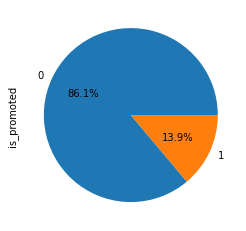

In [ ]:
df['is_promoted'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [ ]:
df.groupby('department').mean().sort_values(by='avg_training_score' , ascending=False)

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
department,,,,,,,,
Analytics,38997.867971,1.345558,33.315403,3.548492,5.533822,0.026895,84.623472,0.370008
R&D,38747.458150,1.383260,33.176211,3.585903,4.911894,0.013216,84.563877,0.387665
Technology,40016.134459,1.262515,35.461001,3.128056,6.266007,0.020955,79.842841,0.186845
Procurement,38958.968109,1.330296,36.343964,3.321185,6.632118,0.015945,70.087699,0.222096
Finance,39099.006711,1.308725,32.875839,3.528523,5.429530,0.023490,60.295302,0.109060
Operations,38862.771549,1.154870,36.746671,3.637351,6.711983,0.025228,60.146111,0.131044
Legal,39121.162698,1.111111,34.845238,3.357143,5.329365,0.023810,60.107143,0.130952
Sales & Marketing,38982.379355,1.260270,35.776911,3.107384,6.332553,0.022101,50.405616,0.021061
HR,40597.211667,1.041667,35.468333,3.460000,6.218333,0.016667,49.911667,0.011667


In [ ]:
pd.crosstab(df.department, df21.is_promoted)

is_promoted,0,1
department,,
Analytics,943,88
Finance,442,48
HR,444,49
Legal,195,13
Operations,2171,205
Procurement,1334,117
R&D,166,15
Sales & Marketing,2869,302
Technology,1318,115


In [ ]:
print(88/943)
print(48/442)
print(13/195)
print(205/2171)
print(117/1334)
print(15/166)
print(302/2869)
print(115/1318)

0.09331919406150584
0.1085972850678733
0.06666666666666667
0.09442653155228005
0.08770614692653673
0.09036144578313253
0.10526315789473684
0.08725341426403642


In [ ]:
df_prom = df[(df['previous_year_rating'] == 5) & (df['awards_won?'] == 1 )]

In [ ]:
top_employe = df_prom.groupby(by = ['employee_id']).agg(avg_train=('avg_training_score','sum'),previous_rating=('previous_year_rating','mean'))
top_employe.sort_values(by='avg_train', ascending=False).head(3)

,avg_train,previous_rating
employee_id,,
76579,98,5.0
54847,96,5.0
64290,95,5.0
